In [1]:
# 每行描述一个广告位，各字段之间由逗号分隔，顺序依次为：“positionID，sitesetID，positionType”。
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
path = '~/codedata/tpai/pre/'
train = pd.read_csv(path + 'train.csv')
position = pd.read_csv(path + 'position.csv')
train = pd.merge(train, position, on = 'positionID', how='left')

In [2]:
train.shape
train.head()

,label,clickTime,conversionTime,creativeID,userID,positionID,connectionType,telecomsOperator,sitesetID,positionType
0,0,170000,NaN,3089,2798058,293,1,1,0,3
1,0,170000,NaN,1259,463234,6161,1,2,0,1
2,0,170000,NaN,4465,1857485,7434,4,1,0,1
3,0,170000,NaN,1004,2038823,977,1,1,0,1
4,0,170000,NaN,1887,2015141,3688,1,1,0,1


In [3]:
test = {}
def property(var, train):
    # 点击量的统计直方图     
    sns.distplot(train[var], kde=False)
    fig = plt.figure()
    count = train[var].value_counts()
    count_index = count.values < 5
    if count_index.any():
        train[var].replace(count[count_index].index, 10000, inplace=True)
    means = train.groupby(var)['label'].mean()
    # 根据var属性的每一个取值做均值     
    plt.scatter(x=means.index, y = means.values)
    sort_means = means.sort_values(ascending = False)
    fig = plt.figure()
    # 按顺序画散点图
    plt.scatter(x = range(0,len(sort_means)), y = sort_means.values)
    return (var, len(train[var].value_counts()), means.max() - means.min(), means.std())

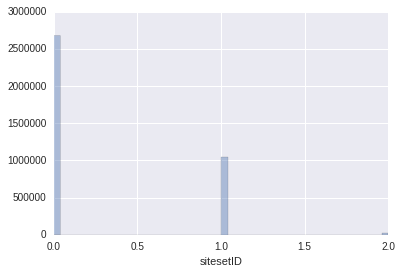

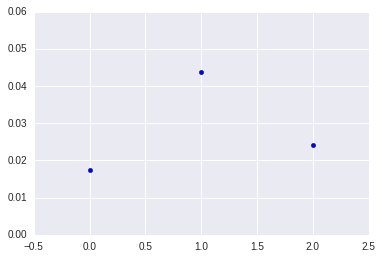

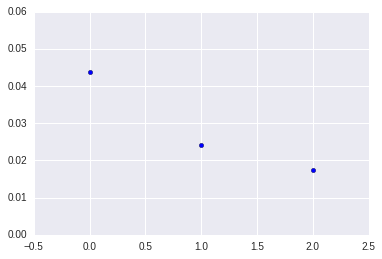

In [4]:
var = 'sitesetID'
test[var] = property(var, train)

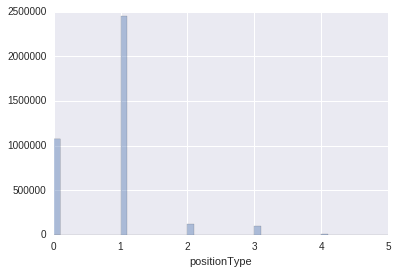

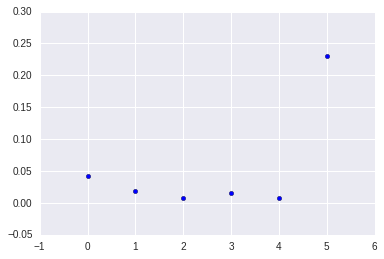

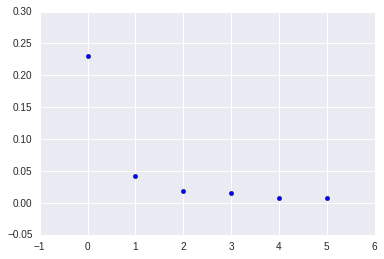

In [5]:
# sns.distplot(position['sitesetID'], kde=False)
# position[position['sitesetID'] == 2]
var = 'positionType'
test[var] = property(var, train)

In [6]:
for (k,v) in test.items():
    print v

('sitesetID', 3, 0.02636969602101254, 0.013700972348893198)
('positionType', 6, 0.22270724758388133, 0.087460470534174911)


,label,sitesetID,positionType
label,1.000000,0.071703,-0.055369
sitesetID,0.071703,1.000000,-0.770979
positionType,-0.055369,-0.770979,1.000000


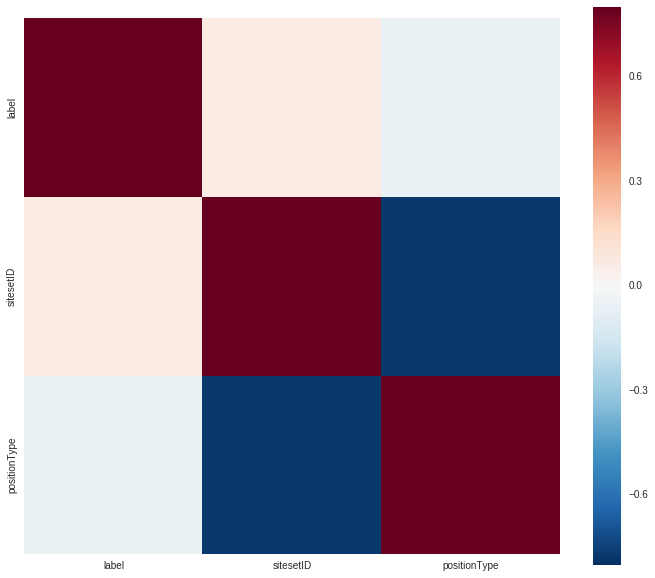

In [7]:
feats = ['label', 'sitesetID', 'positionType']
corr = train[feats].corr()
fig = plt.figure(figsize=(12,10))
sns.heatmap(corr, vmax=.8, square=True)
corr